# Filtering, Grouping & Merging with pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* create a folder named data in the same directory as your notebook 
* download Archive.zip into it
* extract the contents of Archive.zip (may take a minute or two)

In [3]:
cast = pd.read_csv("data/cast.csv")
cast.tail(3)

,title,year,name,type,character,n
3442899,Skammdegi,1985,Dalla Þórðardóttir,actress,Hjúkrunarkona,9.0
3442900,U.S.S.S.S...,2003,Kristín Andrea Þórðardóttir,actress,Afgr.dama á bensínstöð,17.0
3442901,Bye Bye Blue Bird,1999,Rosa á Rógvu,actress,Pensionatværtinde,NaN


In [4]:
len(cast)

3442902

In [5]:
cast.count()

title        3442902
year         3442902
name         3442902
type         3442902
character    3442902
n            2115119
dtype: int64

In [6]:
cast.title.count()

3442902

In [7]:
cast.size

20657412

In [8]:
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3442902 entries, 0 to 3442901
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 157.6+ MB


### basic operations
* df.head([optional value])
* df.tail([optional value])
* df['column name'] or df.column_name to subset by columns
* df[['col1, col2, col...']]
* df[column.isnull()]
* df[column.notnull()]
* df[column == some value] 
* df[(df.column > some value) & (df.column < some value)]
* df.sort_values(by=column, ascending=False) # for descending order
* df['column'].str.any_string_method
* df.index --> returns the index of df or subset
* df.sort_index()
* df.plot --> wrapper around matplotlib
* df.groupby --> allows grouping and aggregation, similar to pivot table
* df.set_index --> easily change index on the fly, can be multi-indexed
* unstack --> must be used on multi-index post aggregation
* df.reset_index --> resets index to integer based
* pd.pivot_table --> pass thi top level function a df, works as pivot table (try help)

In [10]:
mask = cast['n'].isnull()

In [11]:
cast[mask]

,title,year,name,type,character,n
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
...,...,...,...,...,...,...
3442886,Svanurinn,2017,Katla M. Þorgeirsdóttir,actress,Ólöf,NaN
3442892,Foreldrar,2007,Lilja Guðrún Þorvaldsdóttir,actress,Katrin Eldri,NaN
3442893,Rokland,2011,Lilja Guðrún Þorvaldsdóttir,actress,Aðalbjörg - Dagga's Mother,NaN
3442894,XL,2013,Lilja Guðrún Þorvaldsdóttir,actress,Tengdamamma,NaN


In [15]:
cast[~mask].head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
10,When the Man Went South,2014,Taipaleti 'Atu'ake,actor,Two Palms - Ua'i Paame,8.0
11,Little Angel (Angelita),2015,Michael 'babeepower' Viera,actor,Chico,9.0
16,My Song for You,2010,George 'Bootsy' Thomas,actor,Cooley's Customer,16.0
17,My Song for You,2010,George 'Bootsy' Thomas,actor,Celebration Guest,16.0
19,Mariano Mison... NBI,1997,Joseph 'Byron' Sese,actor,Putik's Son,31.0
25,Pelotazo nacional,1993,Félix 'El Gato',actor,Rebolledo,12.0


In [16]:
titles = pd.read_csv("data/titles.csv")

In [17]:
titles.head()

,title,year
0,Ankara ekspresi,1952
1,"Ans Vaterland, ans teure",1915
2,Miss Mohini,2002
3,La vera madre,1999
4,O Amerikanos,1993


In [19]:
titles[titles['year']>1900]

,title,year
0,Ankara ekspresi,1952
1,"Ans Vaterland, ans teure",1915
2,Miss Mohini,2002
3,La vera madre,1999
4,O Amerikanos,1993
...,...,...
226008,Armageddon,1969
226009,Verit i znat,1986
226010,Muukalainen,2008
226011,Byeolmyeongbuteun unjeonsa,1977


In [27]:
years = titles['year'].value_counts().sort_index()

<Axes: >

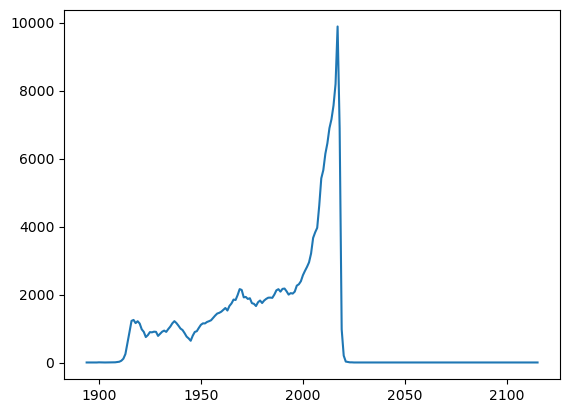

In [29]:
years.plot()

In [25]:
titles[titles['year']>2024]

,title,year
60046,100 Years,2115
67170,Avatar 5,2025
125751,The Zero Century: Maetel,2026


In [33]:
titles[(titles['year']> 2017) & (titles['year'] < 2019)]

,title,year
112,Alex Winter,2018
170,The Queen's Physician,2018
175,Unda,2018
177,The Hunt and Hunted,2018
228,Drive,2018
...,...,...
225820,Coffee Will Make You Black,2018
225873,Nevermind,2018
225900,Frogs to Princesses,2018
225903,700 Horses,2018


In [37]:
titles[titles['year'] == 2019]

,title,year
227,The Beautiful Country,2019
478,The Lido,2019
640,Julius and Hazel,2019
1057,The Contributors,2019
1156,The Telling Room,2019
...,...,...
225312,Raising Jaden,2019
225364,The Nightingale,2019
225411,Housefull 4,2019
225744,Affluenza Unleashed,2019


In [38]:
titles[(titles['year']== 2017) | (titles['year'] == 2019)].sort_values(by='year')

,title,year
8,Pinsky,2017
144874,Holy Air,2017
144877,A Dream Before Dying,2017
144917,Maassab (The Teacher),2017
144925,The Cheaters Club,2017
...,...,...
88755,LOS ANGELES//TEHRAN,2019
174212,This Is Spain,2019
174347,Stuck in the 80's,2019
173994,Butterfly Strings,2019


In [39]:
titles.set_index('year').sort_index()

,title
year,
1894,Miss Jerry
1898,The Startled Lover
1899,Reproduction of the Corbett and Jeffries Fight
1900,Family Troubles (II)
1900,May Day Parade
...,...
2024,Fantastic Beasts and Where to Find Them 5
2024,The Dreams I Have
2025,Avatar 5


In [48]:
titles['decade'] = (titles['year'] / 10).astype(int) * 10

In [49]:
titles

,title,year,decade
0,Ankara ekspresi,1952,1950
1,"Ans Vaterland, ans teure",1915,1910
2,Miss Mohini,2002,2000
3,La vera madre,1999,1990
4,O Amerikanos,1993,1990
...,...,...,...
226008,Armageddon,1969,1960
226009,Verit i znat,1986,1980
226010,Muukalainen,2008,2000
226011,Byeolmyeongbuteun unjeonsa,1977,1970


In [45]:
import math 

In [47]:
math.ceil(2024 /10)

203

In [50]:
titles['decade'].value_counts()

2010    65830
2000    35730
1990    21547
1980    19532
1970    18476
1960    17419
1950    12664
1930    10245
1920     8954
1940     8561
1910     6752
2020      260
1900       39
1890        3
2110        1
Name: decade, dtype: int64

In [57]:
titles[titles['title'].str.contains("Batman")].count()

title     34
year      34
decade    34
dtype: int64

In [54]:
titles[titles['title'].str.contains("Lord of the Rings")]

,title,year,decade
47889,The Lord of the Rings: The Fellowship of the Ring,2001,2000
154780,The Lord of the Rings,1978,1970
155233,The Lord of the Rings: The Return of the King,2003,2000
182919,The Lord of the Rings Symphony,2003,2000
188481,The Lord of the Rings: The Two Towers,2002,2000


In [60]:
 c = cast.set_index(['name', 'year'])

In [62]:
c.reset_index()

,name,year,title,type,character,n
0,Buffy #1,2015,Closet Monster,actor,Buffy 4,31.0
1,Homo $,1985,Suuri illusioni,actor,Guests,22.0
2,$hutter,2017,Battle of the Sexes,actor,Bobby Riggs Fan,10.0
3,$hutter,2015,Secret in Their Eyes,actor,2002 Dodger Fan,NaN
4,$hutter,2015,Steve Jobs,actor,1988 Opera House Patron,NaN
...,...,...,...,...,...,...
3442897,Lilja Þórisdóttir,1988,Foxtrot,actress,Dóra,24.0
3442898,Sigríður Jóna Þórisdóttir,2004,Niceland (Population. 1.000.002),actress,Woman in Bus,26.0
3442899,Dalla Þórðardóttir,1985,Skammdegi,actress,Hjúkrunarkona,9.0
3442900,Kristín Andrea Þórðardóttir,2003,U.S.S.S.S...,actress,Afgr.dama á bensínstöð,17.0


In [63]:
cast[['year', 'title']]

,year,title
0,2015,Closet Monster
1,1985,Suuri illusioni
2,2017,Battle of the Sexes
3,2015,Secret in Their Eyes
4,2015,Steve Jobs
...,...,...
3442897,1988,Foxtrot
3442898,2004,Niceland (Population. 1.000.002)
3442899,1985,Skammdegi
3442900,2003,U.S.S.S.S...


In [64]:
cast.groupby(['title', 'type']).size().unstack()

type,actor,actress
title,,
#211,NaN,8.0
#5,2.0,NaN
#50Fathers,29.0,11.0
#66,12.0,2.0
"#73, Shaanthi Nivaasa",10.0,4.0
...,...,...
whiteonwhite:algorithmicnoir,1.0,1.0
www.XXX.com,2.0,3.0
xXx,62.0,10.0


In [65]:
help(pd.pivot_table)

Help on function pivot_table in module pandas.core.reshape.pivot:

pivot_table(data: 'DataFrame', values=None, index=None, columns=None, aggfunc: 'AggFuncType' = 'mean', fill_value=None, margins: 'bool' = False, dropna: 'bool' = True, margins_name: 'str' = 'All', observed: 'bool' = False, sort: 'bool' = True) -> 'DataFrame'
    Create a spreadsheet-style pivot table as a DataFrame.
    
    The levels in the pivot table will be stored in MultiIndex objects
    (hierarchical indexes) on the index and columns of the result DataFrame.
    
    Parameters
    ----------
    data : DataFrame
    values : column to aggregate, optional
    index : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The
        list can contain any of the other types (except list).
        Keys to group by on the pivot table index.  If an array is passed,
        it is being used as the same manner as column values.
    columns : column, Groupe

In [66]:
pd.concat([titles, cast])

,title,year,decade,name,type,character,n
0,Ankara ekspresi,1952,1950.0,NaN,NaN,NaN,NaN
1,"Ans Vaterland, ans teure",1915,1910.0,NaN,NaN,NaN,NaN
2,Miss Mohini,2002,2000.0,NaN,NaN,NaN,NaN
3,La vera madre,1999,1990.0,NaN,NaN,NaN,NaN
4,O Amerikanos,1993,1990.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3442897,Foxtrot,1988,NaN,Lilja Þórisdóttir,actress,Dóra,24.0
3442898,Niceland (Population. 1.000.002),2004,NaN,Sigríður Jóna Þórisdóttir,actress,Woman in Bus,26.0
3442899,Skammdegi,1985,NaN,Dalla Þórðardóttir,actress,Hjúkrunarkona,9.0
3442900,U.S.S.S.S...,2003,NaN,Kristín Andrea Þórðardóttir,actress,Afgr.dama á bensínstöð,17.0


In [67]:
pd.__version__

'1.5.3'

In [68]:
titles.count()

title     226013
year      226013
decade    226013
dtype: int64

In [70]:
titles['title'].isna().value_counts()


False    226013
Name: title, dtype: int64